In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samples = np.genfromtxt('applesOranges.csv', delimiter=',', skip_header=1)
samples[:2]

array([[ 0.365,  0.708,  0.   ],
       [ 0.543, -0.268,  0.   ]])

a.)

In [3]:
apples = samples[samples[:,2]==0][:, :2]
oranges = samples[samples[:,2]==1][:, :2]

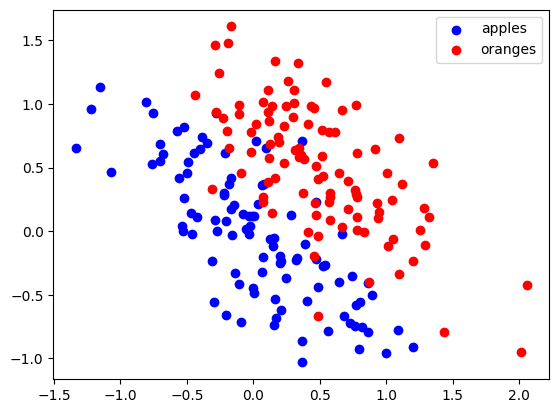

In [4]:
plt.scatter(apples[:, 0], apples[:, 1], color='blue', label='apples')
plt.scatter(oranges[:, 0], oranges[:, 1], color='red', label='oranges')
plt.legend()

## sub exercise b.)

In [5]:
b = 0.0
gammas = np.linspace(0, np.pi, 10, endpoint=True)
gammas

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265])

In [6]:
W = np.array([[np.cos(gamma), np.sin(gamma)] for gamma in gammas])
W

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.39692621e-01,  3.42020143e-01],
       [ 7.66044443e-01,  6.42787610e-01],
       [ 5.00000000e-01,  8.66025404e-01],
       [ 1.73648178e-01,  9.84807753e-01],
       [-1.73648178e-01,  9.84807753e-01],
       [-5.00000000e-01,  8.66025404e-01],
       [-7.66044443e-01,  6.42787610e-01],
       [-9.39692621e-01,  3.42020143e-01],
       [-1.00000000e+00,  1.22464680e-16]])

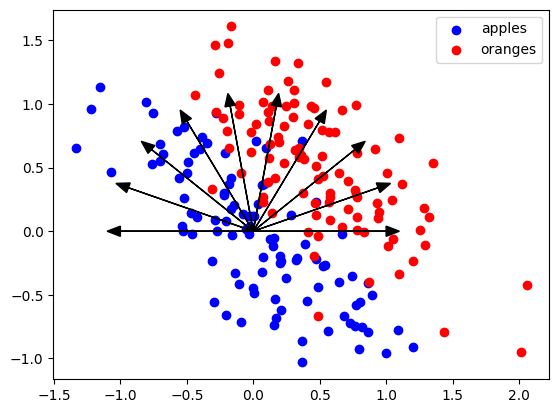

In [7]:
plt.scatter(apples[:, 0], apples[:, 1], color='blue', label='apples')
plt.scatter(oranges[:, 0], oranges[:, 1], color='red', label='oranges')
plt.legend()

for x,y in W:
    plt.arrow(0, 0, x, y, head_width=0.08, head_length=0.1, color='black')     

67.5 % of the samples where classified correct with 0.0 grad


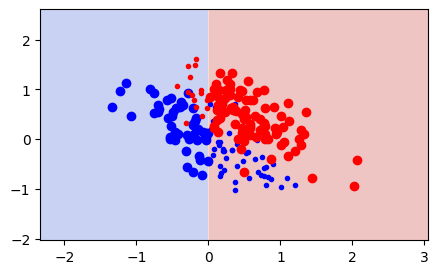

76.0 % of the samples where classified correct with 20.000000000000018 grad


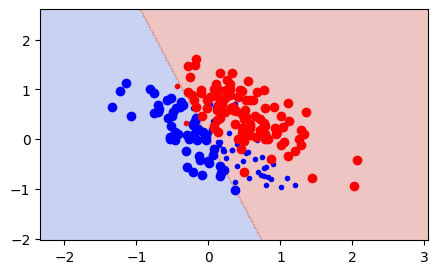

71.0 % of the samples where classified correct with 39.99999999999998 grad


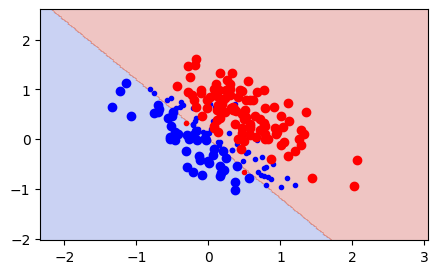

75.5 % of the samples where classified correct with 60.0 grad


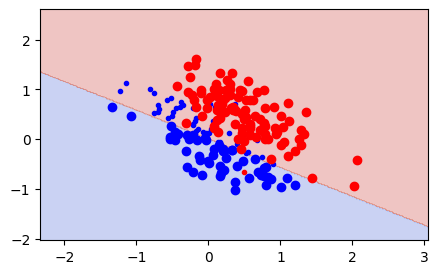

72.5 % of the samples where classified correct with 80.0 grad


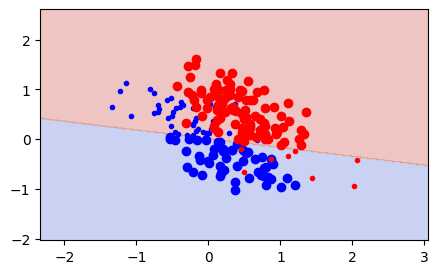

63.0 % of the samples where classified correct with 100.0 grad


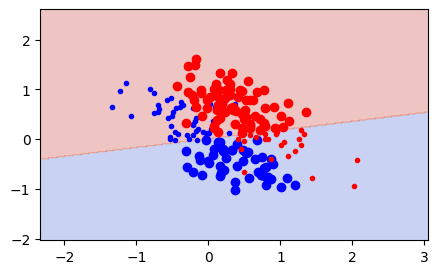

56.49999999999999 % of the samples where classified correct with 120.0 grad


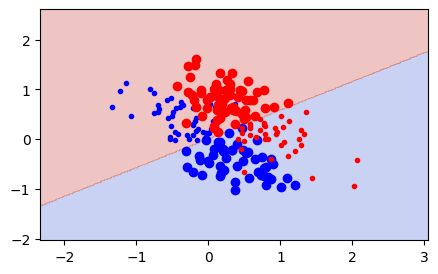

50.5 % of the samples where classified correct with 140.0 grad


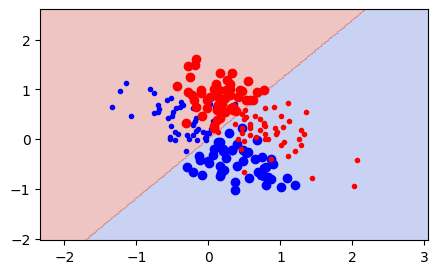

42.0 % of the samples where classified correct with 159.99999999999997 grad


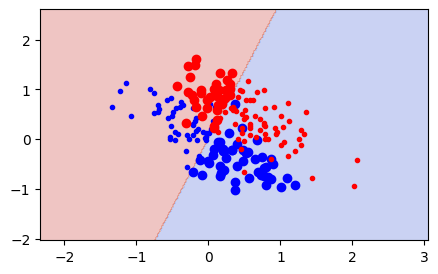

32.5 % of the samples where classified correct with 180.0 grad


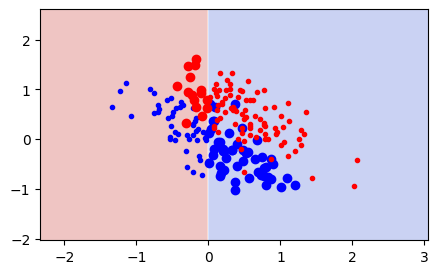

In [8]:
def classify(apples, oranges, w, b):
    mask_apples_right = apples @ w - b <  0
    mask_apples_wrong = np.invert(mask_apples_right)

    mask_oranges_right = oranges @ w - b >= 0
    mask_oranges_wrong = np.invert(mask_oranges_right)

    
    return mask_apples_right, mask_apples_wrong, mask_oranges_right, mask_oranges_wrong
    

def drawClassification(w, b):
    x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
    y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))


    plt.figure(figsize=(5,3))
    plt.contourf(xx2, yy2, (xx2*w[0] + yy2*w[1]) - b > 0, cmap=plt.cm.coolwarm, alpha=0.3)

    mask_apples_right, mask_apples_wrong, mask_oranges_right, mask_oranges_wrong = classify(apples, oranges, w, b)

    plt.scatter(apples[mask_apples_right][:, 0], apples[mask_apples_right][:, 1], color='blue', label='apples', marker='o')
    plt.scatter(apples[mask_apples_wrong][:, 0], apples[mask_apples_wrong][:, 1], color='blue', label='apples', marker='.')

    plt.scatter(oranges[mask_oranges_right][:, 0], oranges[mask_oranges_right][:, 1], color='red', label='oranges', marker='o')
    plt.scatter(oranges[mask_oranges_wrong][:, 0], oranges[mask_oranges_wrong][:, 1], color='red', label='oranges', marker='.')


    correct = (mask_apples_right.sum() + mask_oranges_right.sum()) / len(samples) * 100
    print(f'{correct} % of the samples where classified correct with {np.arccos(w[0])/np.pi * 180} grad')
    

for w in W:
    drawClassification(w, b=0)
    plt.show()
    

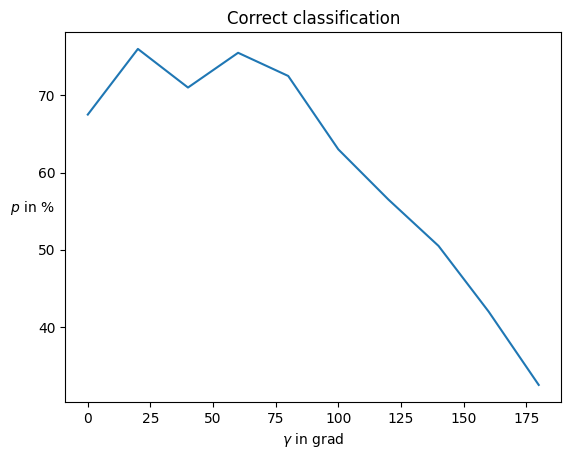

Gamma with 20.0 grad and bias with 0 yielded a classification of 76.0 %


In [9]:
p = []
for w, gamma in zip(W, gammas):
    a, _, o, _ = classify(apples, oranges, w, b=0)
    correct = (a.sum() + o.sum()) / len(samples)
    p.append(correct)
p = np.array(p)
    
plt.plot(gammas/np.pi*180, p*100)
plt.xlabel('$\gamma$ in grad')
plt.ylabel('$p$ in %', rotation='horizontal')
plt.title('Correct classification')
plt.show()

print(f'Gamma with {gammas[p.argmax()]/np.pi*180} grad and bias with 0 yielded a classification of {p.max()*100} %') 

## sub exercise c.) and d.)

In [10]:
w_best = W[p.argmax()] # select best w
gamma_best = gammas[p.argmax()]

w_best, gamma_best

(array([0.93969262, 0.34202014]), 0.3490658503988659)

In [11]:
np.arccos(W[:,0])/np.pi *180

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.])

In [12]:
B = np.linspace(-3, 3, 1000, endpoint=True)

80.5 % of the samples where classified correct with 20.000000000000018 grad
Gamma with 20.0 grad and bias of 0.1351351351351351 yielded a classification of 80.5 %


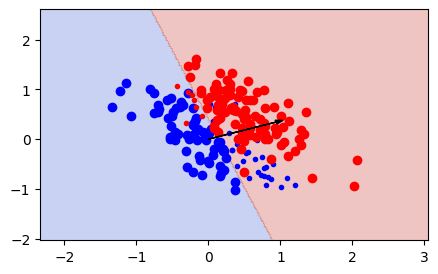

In [13]:
p = []
for b in B:
    a, _, o, _ = classify(apples, oranges, w_best, b)
    correct = (a.sum() + o.sum()) / len(samples)
    p.append(correct)
p = np.array(p)

drawClassification(w_best, B[p.argmax()])
plt.arrow(0, 0, w_best[0], w_best[1], head_width=0.08, head_length=0.1, color='black')     
plt.show

print(f'Gamma with {gamma_best/np.pi*180} grad and bias of {B[p.argmax()]} yielded a classification of {p.max()*100} %') 

## subexcercise e.)

In [14]:
p = []
for w, gamma in zip(W, gammas):
    a, _, o, _ = classify(apples, oranges, w, b=0)
    correct = (a.sum() + o.sum()) / len(samples)
    p.append(correct)
p = np.array(p)

86.0 % of the samples where classified correct with 44.999999999999986 grad


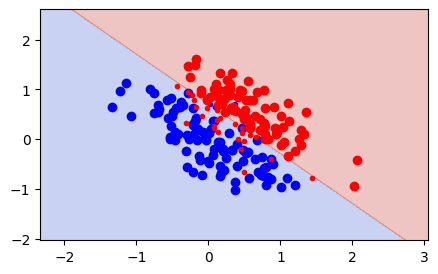

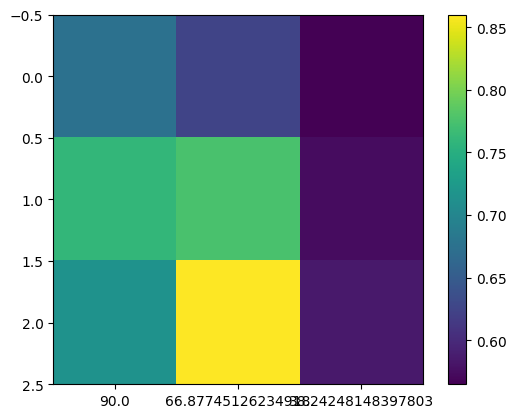

In [62]:
def gridsearch():
    gammas = np.linspace(0, np.pi/4, 3)
    B = np.linspace(0, 1, 3) 
    
    combinations = np.array(np.meshgrid(gammas, B)).T.reshape(-1,2)
    
    p = []
    for gamma, b in combinations:
        w = np.array([np.cos(gamma), np.sin(gamma)]) 
        a, _, o, _ = classify(apples, oranges, w, b)
        
        correct = (a.sum() + o.sum()) / len(samples)
        p.append(correct)
    p = np.array(p)
    
    gamma = combinations[p.argmax()][0]
    b = combinations[p.argmax()][1]


    drawClassification(np.array([np.cos(gamma), np.sin(gamma)]) , b)
    plt.show()
    
    x_ticks = 
    plt.xticks(ticks=np.arange(len(x_ticks)),labels=x_ticks)
    plt.imshow(p.reshape(3,3), interpolation=None)
    plt.colorbar()
    
        
    
gridsearch()

## sub task f.)

Grid search is not feasable for classifications problems with a lot of parameters.